In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.e

In [2]:
data=pd.read_csv("train_ctrUa4K.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
data['Dependents']=data.Dependents.map({'0':'zero','1':'one','2':'two','3+':'three_or_more'})
data['Credit_History']=data.Credit_History.map({0:'zero',1:'one'})
data['Loan_Amount_Term']=data.Loan_Amount_Term.map({12:'one',36:'three',60:'five',84:'seven',120:'ten',180:'fifteen',240:'twenty',300:'twentyfive',360:'thirty',480:'forty'})

In [5]:
for column in ('Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Education'):
    data[column].fillna(data[column].mode()[0],inplace=True)
for column in ('LoanAmount','CoapplicantIncome','ApplicantIncome'):
    data[column].fillna(data[column].mean(),inplace=True)

In [6]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data['Education'] = data['Education'].str.replace(' ','_')

In [8]:
data['Loan_Status']=data.Loan_Status.map({'Y':0,'N':1})
Y=data['Loan_Status'].values
data.drop(['Loan_Status'],axis=1,inplace=True)
X=data[data.iloc[:,1:13].columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
print("="*50,"Gender","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer.transform(X_test['Gender'].values)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Married","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Married'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Married_ohe = vectorizer.transform(X_train['Married'].values)
X_test_Married_ohe = vectorizer.transform(X_test['Married'].values)

print("After vectorizations")
print(X_train_Married_ohe.shape, y_train.shape)
print(X_test_Married_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Dependents","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Dependents'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Dependents_ohe = vectorizer.transform(X_train['Dependents'].values)
X_test_Dependents_ohe = vectorizer.transform(X_test['Dependents'].values)

print("After vectorizations")
print(X_train_Dependents_ohe.shape, y_train.shape)
print(X_test_Dependents_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Education","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Education'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Education_ohe = vectorizer.transform(X_train['Education'].values)
X_test_Education_ohe = vectorizer.transform(X_test['Education'].values)

print("After vectorizations")
print(X_train_Education_ohe.shape, y_train.shape)
print(X_test_Education_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Self_Employed","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Self_Employed'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Self_Employed_ohe = vectorizer.transform(X_train['Self_Employed'].values)
X_test_Self_Employed_ohe = vectorizer.transform(X_test['Self_Employed'].values)

print("After vectorizations")
print(X_train_Self_Employed_ohe.shape, y_train.shape)
print(X_test_Self_Employed_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Property_Area","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Property_Area'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Property_Area_ohe = vectorizer.transform(X_train['Property_Area'].values)
X_test_Property_Area_ohe = vectorizer.transform(X_test['Property_Area'].values)

print("After vectorizations")
print(X_train_Property_Area_ohe.shape, y_train.shape)
print(X_test_Property_Area_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Loan_Amount_Term","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Loan_Amount_Term'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Loan_Amount_Term_ohe = vectorizer.transform(X_train['Loan_Amount_Term'].values)
X_test_Loan_Amount_Term_ohe = vectorizer.transform(X_test['Loan_Amount_Term'].values)

print("After vectorizations")
print(X_train_Loan_Amount_Term_ohe.shape, y_train.shape)
print(X_test_Loan_Amount_Term_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Credit_History","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Credit_History'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Credit_History_ohe = vectorizer.transform(X_train['Credit_History'].values)
X_test_Credit_History_ohe = vectorizer.transform(X_test['Credit_History'].values)

print("After vectorizations")
print(X_train_Credit_History_ohe.shape, y_train.shape)
print(X_test_Credit_History_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


================================================== Gender ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['female', 'male']

================================================== Married ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Dependents ==================================================
After vectorizations
(411, 4) (411,)
(203, 4) (203,)
['one', 'three_or_more', 'two', 'zero']

================================================== Education ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['graduate', 'not_graduate']

================================================== Self_Employed ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Pro

In [11]:
from sklearn.preprocessing import Normalizer
print("="*50,"LoanAmount","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = normalizer.transform(X_train['LoanAmount'].values.reshape(1,-1))
X_test_LoanAmount_norm = normalizer.transform(X_test['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = X_train_LoanAmount_norm.reshape(-1,1)
X_test_LoanAmount_norm = X_test_LoanAmount_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_LoanAmount_norm.shape, y_train.shape)
print(X_test_LoanAmount_norm.shape, y_test.shape)
print()

print("="*50,"ApplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = normalizer.transform(X_train['ApplicantIncome'].values.reshape(1,-1))
X_test_ApplicantIncome_norm = normalizer.transform(X_test['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = X_train_ApplicantIncome_norm.reshape(-1,1)
X_test_ApplicantIncome_norm = X_test_ApplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_ApplicantIncome_norm.shape, y_train.shape)
print(X_test_ApplicantIncome_norm.shape, y_test.shape)
print()

print("="*50,"CoapplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = normalizer.transform(X_train['CoapplicantIncome'].values.reshape(1,-1))
X_test_CoapplicantIncome_norm = normalizer.transform(X_test['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = X_train_CoapplicantIncome_norm.reshape(-1,1)
X_test_CoapplicantIncome_norm = X_test_CoapplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_CoapplicantIncome_norm.shape, y_train.shape)
print(X_test_CoapplicantIncome_norm.shape, y_test.shape)

================================================== LoanAmount ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== ApplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== CoapplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)


In [12]:
from scipy.sparse import hstack
X_tr = hstack((X_train_Gender_ohe, X_train_Married_ohe, X_train_Dependents_ohe,X_train_Education_ohe,X_train_Self_Employed_ohe,X_train_Property_Area_ohe,X_train_Loan_Amount_Term_ohe,X_train_Credit_History_ohe,X_train_LoanAmount_norm,X_train_ApplicantIncome_norm,X_train_CoapplicantIncome_norm)).tocsr()
X_te = hstack((X_test_Gender_ohe, X_test_Married_ohe, X_test_Dependents_ohe,X_test_Education_ohe,X_test_Self_Employed_ohe,X_test_Property_Area_ohe,X_test_Loan_Amount_Term_ohe,X_test_Credit_History_ohe,X_test_LoanAmount_norm,X_test_ApplicantIncome_norm,X_test_CoapplicantIncome_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*125)

Final Data matrix
(411, 30) (411,)
(203, 30) (203,)


<h1>Caliberated Model</h1>

<h2> 1) SVM Model </h2>

In [35]:
from sklearn.calibration import CalibratedClassifierCV,calibration_curve

In [13]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search_svm.fit(X_tr, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
best_param=grid_search_svm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'C': 1, 'gamma': 0.01}


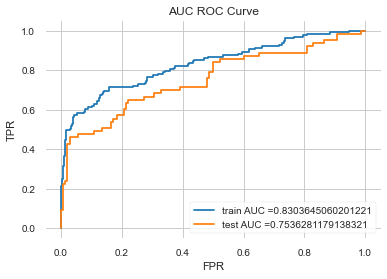

In [15]:
from sklearn.metrics import roc_curve, auc

SVM_model= SVC(kernel='rbf',C=best_param['C'],gamma=best_param['gamma'],probability=True)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
SVM_model.fit(X_tr, y_train)


y_train_pred = SVM_model.predict_proba(X_tr)    
y_test_pred = SVM_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [16]:
y_test_predict=SVM_model.predict(X_te)
print("Recall for  SVM model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for SVM model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for SVM model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for SVM model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for SVM model:",metrics.log_loss(y_test,y_test_predict))

Recall for  SVM model: 0.42857142857142855
Precision for SVM model: 0.9
Accuracy for SVM model: 0.8078817733990148
F-score for SVM model: 0.5806451612903225
Log-loss for SVM model: 6.635540286669002


In [38]:
calibrated_SVM = CalibratedClassifierCV(SVM_model, method='sigmoid', cv=5)
calibrated_SVM.fit(X_tr,y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma=0.01, kernel='rbf',
                                          max_iter=-1, probability=True,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=5, method='sigmoid')

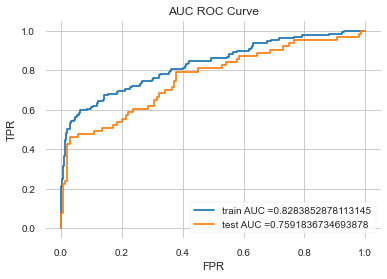

In [39]:
y_train_pred_calib = calibrated_SVM.predict_proba(X_tr)    
y_test_pred_calib = calibrated_SVM.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_calib[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_calib[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [40]:
y_test_predict=calibrated_SVM.predict(X_te)
print("Recall for  Caliberated SVM model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Caliberated SVM model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Caliberated SVM model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Caliberated SVM model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Caliberated SVM model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Caliberated SVM model: 0.42857142857142855
Precision for Caliberated SVM model: 0.9
Accuracy for Caliberated SVM model: 0.8078817733990148
F-score for Caliberated SVM model: 0.5806451612903225
Log-loss for Caliberated SVM model: 6.635540286669002


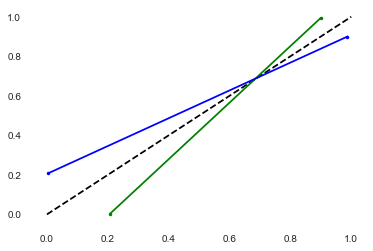

In [47]:
probs_SVM = SVM_model.predict_proba(X_te)[:, 1]
probs_SVMCalib= calibrated_SVM.predict_proba(X_te)[:, 1]
fop, mpv = calibration_curve(y_test, probs_SVM, n_bins=10, normalize=True)
fop_calib, mpv_calib = calibration_curve(y_test, probs_SVMCalib, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
plt.plot(fop, mpv, marker='.',color='green')
plt.plot(mpv_calib, fop_calib, marker='.',color='blue')
plt.show()


<h2> 2) Logistic Regression </h2>

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Best Hyperparameter:  {'C': 10}


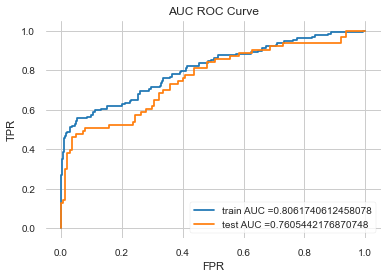

In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr, y_train)
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']
from sklearn.metrics import roc_curve, auc


Log_model = LogisticRegression(C=p_C)
Log_model.fit(X_tr, y_train)


y_train_pred = Log_model.predict_proba(X_tr)    
y_test_pred = Log_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()


In [30]:
#y_test_predict=predict_with_best_t(y_test_pred[:,1], best_t)
y_test_predict=Log_model.predict(X_te)
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))

Recall for logistic regression model: 0.5079365079365079
Precision for logistic regression model: 0.7441860465116279
Accuracy for logistic regression model: 0.7931034482758621
F-score for logistic regression model: 0.6037735849056604
Log-loss for logistic regression model: 7.14599706481764


C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

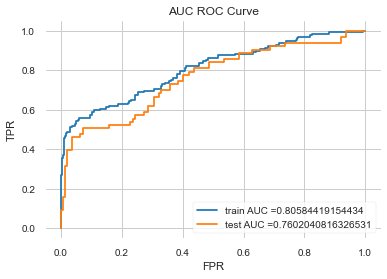

In [45]:
calibrated_log = CalibratedClassifierCV(Log_model, method='sigmoid', cv=5)
calibrated_log.fit(X_tr,y_train)
y_train_pred = calibrated_log.predict_proba(X_tr)    
y_test_pred = calibrated_log.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()


In [46]:
y_test_predict=calibrated_log.predict(X_te)
print("Recall for  Caliberated LR model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Caliberated LR model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Caliberated LR model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Caliberated LR model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Caliberated LR model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Caliberated SVM model: 0.4603174603174603
Precision for Caliberated SVM model: 0.7631578947368421
Accuracy for Caliberated SVM model: 0.7881773399014779
F-score for Caliberated SVM model: 0.5742574257425742
Log-loss for Caliberated SVM model: 7.316130942650399


<h2> 3) Decision Tree </h2>

In [48]:
min_sample_leaf_val=[1,2,3,4,5,6,7,8,9,10]
criterion_val=['entropy','gini']
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[10,100,150,200,250]
param_grid = {'max_depth':max_depth,'criterion':criterion_val,'min_samples_leaf':min_sample_leaf_val,'min_samples_split':min_samples_split}
DT_model=DecisionTreeClassifier()
clf = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=3)
clf.fit(X_tr,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [49]:
best_param=clf.best_params_
print("Best Hyperparameter: ",best_param)
max_depth_DT=best_param['max_depth']
min_samples_split_DT=best_param['min_samples_split']
min_samples_leaf_DT=best_param['min_samples_leaf']
criterion_DT=best_param['criterion']

Best Hyperparameter:  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}


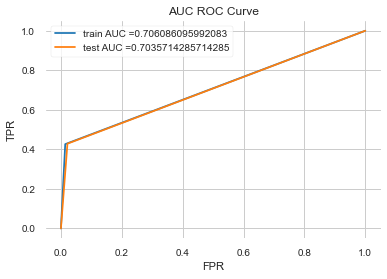

In [50]:
from sklearn.metrics import roc_curve, auc


DT_model= DecisionTreeClassifier(max_depth=max_depth_DT,min_samples_leaf=min_samples_leaf_DT,criterion=criterion_DT,min_samples_split=min_samples_split_DT)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
DT_model.fit(X_tr, y_train)


y_train_pred = DT_model.predict_proba(X_tr)    
y_test_pred = DT_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [51]:
DT_pred=DT_model.predict(X_te)
print("Recall for decision tree model:",metrics.recall_score(y_test,DT_pred))
print("Precision for decision tree model:",metrics.precision_score(y_test,DT_pred))
print("Accuracy for decision tree model:",metrics.accuracy_score(y_test,DT_pred))
print("F-score for decision tree model:",metrics.f1_score(y_test,DT_pred))
print("Log-loss for decision tree model:",metrics.log_loss(y_test,DT_pred))

Recall for decision tree model: 0.42857142857142855
Precision for decision tree model: 0.9
Accuracy for decision tree model: 0.8078817733990148
F-score for decision tree model: 0.5806451612903225
Log-loss for decision tree model: 6.635540286669002


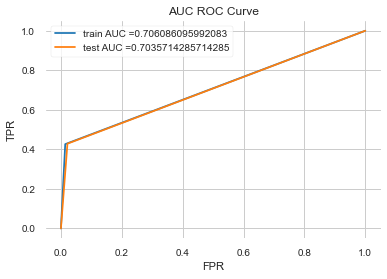

In [52]:
calibrated_DT = CalibratedClassifierCV(DT_model, method='sigmoid', cv=5)
calibrated_DT.fit(X_tr,y_train)
y_train_pred = calibrated_DT.predict_proba(X_tr)    
y_test_pred = calibrated_DT.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [53]:
y_test_predict=calibrated_DT.predict(X_te)
print("Recall for  Caliberated DT model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Caliberated DT model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Caliberated DT model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Caliberated DT model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Caliberated DT model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Caliberated SVM model: 0.42857142857142855
Precision for Caliberated SVM model: 0.9
Accuracy for Caliberated SVM model: 0.8078817733990148
F-score for Caliberated SVM model: 0.5806451612903225
Log-loss for Caliberated SVM model: 6.635540286669002


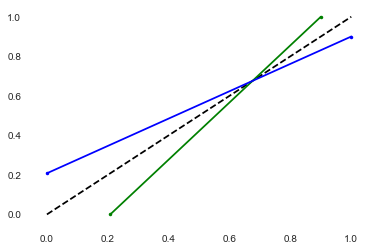

In [54]:
probs_DT = DT_model.predict_proba(X_te)[:, 1]
probs_DTCalib= calibrated_DT.predict_proba(X_te)[:, 1]
fop, mpv = calibration_curve(y_test, probs_DT, n_bins=10, normalize=True)
fop_calib, mpv_calib = calibration_curve(y_test, probs_DTCalib, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
plt.plot(fop, mpv, marker='.',color='green')
plt.plot(mpv_calib, fop_calib, marker='.',color='blue')
plt.show()

<h2> 4) Random Forest Model </h2>

In [55]:
n_estimator_val = [100,150,300,500,1000]
n_sample_leaf_val = [1,2,3,4,5,6]
max_feature_val=["auto","sqrt",None,0.9]
param_grid = {'n_estimators': n_estimator_val, 'min_samples_leaf' : n_sample_leaf_val,'max_features':max_feature_val}
RF_model=RandomForestClassifier()
grid_search_RF = GridSearchCV(estimator = RF_model,param_grid=param_grid, cv=3,scoring='roc_auc',return_train_score=True)
grid_search_RF.fit(X_tr, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [56]:
best_param=grid_search_RF.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 300}


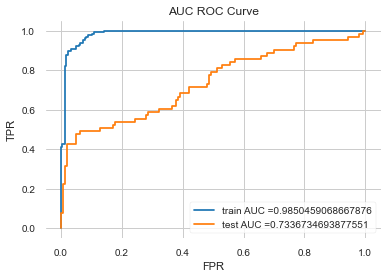

In [57]:
from sklearn.metrics import roc_curve, auc

RF_model= RandomForestClassifier(n_estimators=best_param['n_estimators'],min_samples_leaf=best_param['min_samples_leaf'],max_features=best_param['max_features'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
RF_model.fit(X_tr, y_train)


y_train_pred = RF_model.predict_proba(X_tr)    
y_test_pred = RF_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [58]:
y_test_predict=RF_model.predict(X_te)
print("Recall for Random Forest model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Random Forest model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Random Forest model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Random Forest model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Random Forest model:",metrics.log_loss(y_test,y_test_predict))

Recall for Random Forest model: 0.42857142857142855
Precision for Random Forest model: 0.8709677419354839
Accuracy for Random Forest model: 0.8029556650246306
F-score for Random Forest model: 0.574468085106383
Log-loss for Random Forest model: 6.8056859812125525


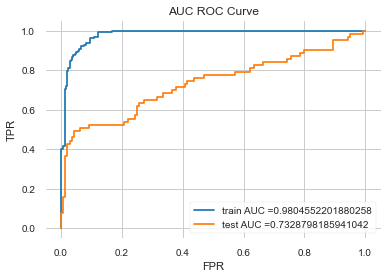

In [59]:
calibrated_RF = CalibratedClassifierCV(RF_model, method='sigmoid', cv=5)
calibrated_RF.fit(X_tr,y_train)
y_train_pred = calibrated_RF.predict_proba(X_tr)    
y_test_pred = calibrated_RF.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [60]:
y_test_predict=calibrated_RF.predict(X_te)
print("Recall for  Caliberated RF model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Caliberated RF model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Caliberated RF model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Caliberated RF model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Caliberated RF model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Caliberated RF model: 0.42857142857142855
Precision for Caliberated RF model: 0.8709677419354839
Accuracy for Caliberated RF model: 0.8029556650246306
F-score for Caliberated RF model: 0.574468085106383
Log-loss for Caliberated RF model: 6.8056859812125525


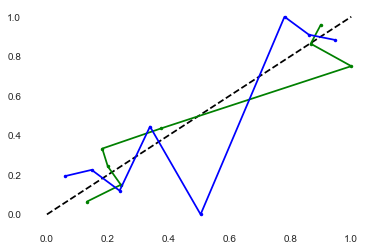

In [61]:
probs_RF = RF_model.predict_proba(X_te)[:, 1]
probs_RFCalib= calibrated_RF.predict_proba(X_te)[:, 1]
fop, mpv = calibration_curve(y_test, probs_RF, n_bins=10, normalize=True)
fop_calib, mpv_calib = calibration_curve(y_test, probs_RFCalib, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
plt.plot(fop, mpv, marker='.',color='green')
plt.plot(mpv_calib, fop_calib, marker='.',color='blue')
plt.show()